In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df = pd.merge(ride_df,city_df,on="city",how="left")
# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
# Obtain the x and y coordinates for each of the three city types
grouped_df = df.groupby(["type","city"])
n_of_r_per_city_df = pd.DataFrame(grouped_df["fare"].count())
n_of_r_per_city_df = n_of_r_per_city_df.rename(columns={"fare":"Total Number of Rides (Per City)"})

In [4]:
average_fare_df = pd.DataFrame(grouped_df["fare"].mean())
average_fare_df = average_fare_df.rename(columns={"fare":"Average Fare ($)"})

In [5]:
driver_count_df = pd.DataFrame(grouped_df["driver_count"].mean())

In [6]:
merged_df = average_fare_df.join(n_of_r_per_city_df,how="outer")
merged_df = merged_df.join(driver_count_df,how="outer")
merged_df = merged_df.reset_index()
merged_df.head()

,type,city,Average Fare ($),Total Number of Rides (Per City),driver_count
0,Rural,Bradshawfurt,40.064000,10,7
1,Rural,Garzaport,24.123333,3,7
2,Rural,Harringtonfort,33.470000,6,4
3,Rural,Jessicaport,36.013333,6,1
4,Rural,Lake Jamie,34.358333,6,4


In [7]:
rural_df = merged_df.loc[merged_df["type"]=="Rural"]
suburban_df = merged_df.loc[merged_df["type"]=="Suburban"]
urban_df = merged_df.loc[merged_df["type"]=="Urban"]

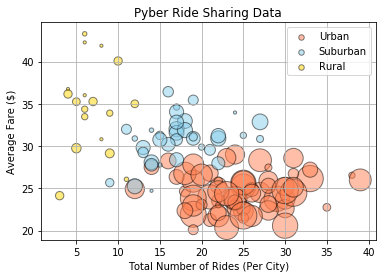

In [8]:
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure
for frame in [urban_df, suburban_df, rural_df]:
    if frame["type"].unique() == ['Urban']:
        color = "coral"
        label = "Urban"
    if frame["type"].unique() == ['Suburban']:
        color = "skyblue"
        label = "Suburban"
    if frame["type"].unique() == ['Rural']:
        color = "gold"
        label = "Rural"
    plt.scatter(frame["Total Number of Rides (Per City)"], frame["Average Fare ($)"], s=frame["driver_count"]*10,
                color=color, label=label, edgecolor="Black",alpha = 0.5)

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")
lgnd = plt.legend(loc="upper right")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.grid()
plt.savefig("PyberRideSharingData.png")
plt.show()

C:\Users\dunda\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


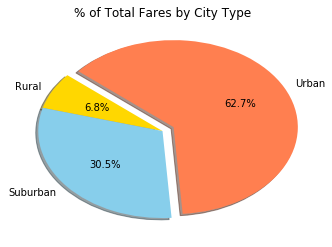

In [9]:
# Total Fares by City Type
# Calculate Type Percents
tf_rural = sum(rural_df["Average Fare ($)"]*rural_df["Total Number of Rides (Per City)"])
tf_suburban = sum(suburban_df["Average Fare ($)"]*suburban_df["Total Number of Rides (Per City)"])
tf_urban = sum(urban_df["Average Fare ($)"]*urban_df["Total Number of Rides (Per City)"])

labels = ["Rural", "Suburban", "Urban"]
sizes = [tf_rural, tf_suburban, tf_urban]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.axes().set_aspect(0.7)
# Save Figure
plt.savefig("PercentOfTotalFaresByCityType.png")
plt.show()

C:\Users\dunda\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


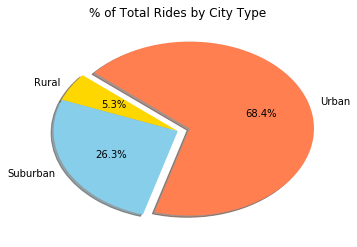

In [10]:
# Total Rides by City Type
# Calculate Ride Percents
tr_rural = sum(rural_df["Total Number of Rides (Per City)"])
tr_suburban = sum(suburban_df["Total Number of Rides (Per City)"])
tr_urban = sum(urban_df["Total Number of Rides (Per City)"])

labels = ["Rural", "Suburban", "Urban"]
sizes = [tr_rural, tr_suburban, tr_urban]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axes().set_aspect(0.7)
# Save Figure
plt.savefig("PercentOfTotalRidesByCityType.png")
plt.show()

C:\Users\dunda\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


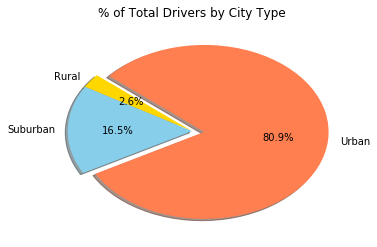

In [11]:
# Total Drivers by City Type
# Calculate Driver Percents
td_rural = sum(rural_df["driver_count"])
td_suburban = sum(suburban_df["driver_count"])
td_urban = sum(urban_df["driver_count"])

labels = ["Rural", "Suburban", "Urban"]
sizes = [td_rural, td_suburban, td_urban]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.axes().set_aspect(0.7)
# Save Figure
plt.savefig("PercentOfTotalDriversByCityType.png")
plt.show()